In [6]:
import pygame
import random
from enum import Enum
from collections import namedtuple

class Direction(Enum):
    RIGHT = 1
    LEFT = 2
    UP = 3
    DOWN = 4

Point = namedtuple("Point", "x, y")


pygame.display.init()
pygame.font.init()

font = pygame.font.Font(pygame.font.get_default_font(), 25)


WHITE = (255, 255, 255)
RED = (200,0,0)
BLUE1 = (0, 0, 255)
BLUE2 = (0, 100, 255)
BLACK = (0,0,0)

BLOCK_SIZE = 20
SPEED = 10

class SnakeGame:

    def __init__(self, width=640, height=480, playerName="Player"):
        self.w = width
        self.h = height
        self.playerName = playerName



        self.display = pygame.display.set_mode((self.w, self.h))
        pygame.display.set_caption("Silly Snake")
        self.clock = pygame.time.Clock()


        self.direction = Direction.RIGHT
        self.head = Point(self.w / 2, self.h / 2)
        self.snake = [self.head,
                      Point(self.head.x - BLOCK_SIZE, self.head.y),
                      Point(self.head.x - (2 * BLOCK_SIZE), self.head.y)]

        self.score = 0
        self.food = None

        self.placeFood()

    def placeFood(self):
        x = random.randint(0, (self.w-BLOCK_SIZE )//BLOCK_SIZE )*BLOCK_SIZE
        y = random.randint(0, (self.h-BLOCK_SIZE )//BLOCK_SIZE )*BLOCK_SIZE
        self.food = Point(x, y)
        if self.food in self.snake:
            self.placeFood()

    def playStep(self):


        for event in pygame.event.get():
            if event == pygame.QUIT:
                pygame.quit()
                quit()

            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    self.direction = Direction.LEFT
                elif event.key == pygame.K_RIGHT:
                    self.direction = Direction.RIGHT
                elif event.key == pygame.K_UP:
                    self.direction = Direction.UP
                elif event.key == pygame.K_DOWN:
                    self.direction = Direction.DOWN

        self.moveSnake(self.direction)


        if self.isCollision():
            gameOver = True

            return gameOver, self.score



        if self.head == self.food:
            self.score += 1
            self.placeFood()
        else:
            self.snake.pop()


        self.updateUi()
        self.clock.tick(SPEED)

        gameOver = False

        return gameOver, self.score

    def isCollision(self):



        if self.head.x > self.w - BLOCK_SIZE or self.head.x < 0:
            return True

        if self.head.y > self.h - BLOCK_SIZE or self.head.y < 0:
            return True



        if self.head in self.snake[1:]:
            return True

        return False


    def moveSnake(self, direction: Direction):

        x = self.head.x
        y = self.head.y

        if direction == Direction.RIGHT:
            x += BLOCK_SIZE
        elif direction == Direction.LEFT:
            x -= BLOCK_SIZE
        elif direction == Direction.DOWN:
            y += BLOCK_SIZE
        elif direction == Direction.UP:
            y -= BLOCK_SIZE

        self.head = Point(x, y)


        self.snake.insert(0, self.head)

    def updateUi(self):
        self.display.fill(BLACK)

        for p in self.snake:
            pygame.draw.rect(self.display, BLUE1, pygame.Rect(p.x, p.y, BLOCK_SIZE, BLOCK_SIZE))
            pygame.draw.rect(self.display, BLUE2, pygame.Rect(p.x + 4, p.y + 4, 12, 12))

        pygame.draw.rect(self.display, RED, pygame.Rect(self.food.x, self.food.y, BLOCK_SIZE, BLOCK_SIZE))

        scoreText = font.render("Score: " + str(self.score) + " Speed: " + str(SPEED) + " Player: " + self.playerName, True, WHITE)

        self.display.blit(scoreText, [0, 0])

        pygame.display.flip()

def playGame(playerName = "Stefan"):

    game = SnakeGame(playerName=playerName)

    while True:
        gameOver, score = game.playStep()



        if gameOver == True:
            break

    print("Game Over, final score: ", score)

    pygame.quit()


if __name__ == "__main__":
    playGame()

Game Over, final score:  0


In [7]:
import pygame
import random
from enum import Enum
from collections import namedtuple
import numpy as np

class Direction(Enum):
    RIGHT = 1
    LEFT = 2
    UP = 3
    DOWN = 4

Point = namedtuple("Point", "x, y")


pygame.display.init()
pygame.font.init()

font = pygame.font.Font(pygame.font.get_default_font(), 25)


WHITE = (255, 255, 255)
RED = (200,0,0)
BLUE1 = (0, 0, 255)
BLUE2 = (0, 100, 255)
BLACK = (0,0,0)

BLOCK_SIZE = 20
SPEED = 120

class SillySnakeGameAi:

    def __init__(self, width=640, height=480, playerName="Player"):
        self.w = width
        self.h = height
        self.playerName = playerName



        self.display = pygame.display.set_mode((self.w, self.h))
        pygame.display.set_caption("Silly Snake")
        self.clock = pygame.time.Clock()


        self.reset()

    def reset(self):
        self.direction = Direction.RIGHT
        self.head = Point(self.w / 2, self.h / 2)
        self.snake = [self.head,
                      Point(self.head.x - BLOCK_SIZE, self.head.y),
                      Point(self.head.x - (2 * BLOCK_SIZE), self.head.y)]

        self.score = 0
        self.food = None

        self.placeFood()

        self.frameIteration = 0


    def placeFood(self):
        x = random.randint(0, (self.w-BLOCK_SIZE )//BLOCK_SIZE )*BLOCK_SIZE
        y = random.randint(0, (self.h-BLOCK_SIZE )//BLOCK_SIZE )*BLOCK_SIZE
        self.food = Point(x, y)
        if self.food in self.snake:
            self.placeFood()

    def playStep(self, action):


        self.frameIteration += 1

        for event in pygame.event.get():
            if event == pygame.QUIT:
                pygame.quit()
                quit()


        self.moveSnake(action)


        reward = 0



        if self.isCollision() or self.frameIteration > 100 * len(self.snake):
            gameOver = True

            reward -= 10

            return reward, gameOver, self.score



        if self.head == self.food:
            self.score += 1
            reward = 10
            self.placeFood()
        else:
            self.snake.pop()


        self.updateUi()
        self.clock.tick(SPEED)

        gameOver = False

        return reward, gameOver, self.score

    def isCollision(self, p: Point = None):

        if p == None:
            p = self.head


        if p.x > self.w - BLOCK_SIZE or p.x < 0:
            return True

        if p.y > self.h - BLOCK_SIZE or p.y < 0:
            return True



        if p in self.snake[1:]:
            return True

        return False

    def moveSnake(self, action):


        clockWiseDirections = [Direction.RIGHT, Direction.DOWN, Direction.LEFT, Direction.UP]
        currentDirectionIndex = clockWiseDirections.index(self.direction)

        newDirection = self.direction

        if np.array_equal(action, [0, 1, 0]):
            newDirection = clockWiseDirections[(currentDirectionIndex + 1) % 4]
        elif np.array_equal(action, [0, 1, 0]):
            newDirection = clockWiseDirections[(currentDirectionIndex - 1) % 4]

        self.direction = newDirection

        x = self.head.x
        y = self.head.y

        if self.direction == Direction.RIGHT:
            x += BLOCK_SIZE
        elif self.direction == Direction.LEFT:
            x -= BLOCK_SIZE
        elif self.direction == Direction.DOWN:
            y += BLOCK_SIZE
        elif self.direction == Direction.UP:
            y -= BLOCK_SIZE

        self.head = Point(x, y)


        self.snake.insert(0, self.head)


    def updateUi(self):
        self.display.fill(BLACK)

        for p in self.snake:
            pygame.draw.rect(self.display, BLUE1, pygame.Rect(p.x, p.y, BLOCK_SIZE, BLOCK_SIZE))
            pygame.draw.rect(self.display, BLUE2, pygame.Rect(p.x + 4, p.y + 4, 12, 12))

        pygame.draw.rect(self.display, RED, pygame.Rect(self.food.x, self.food.y, BLOCK_SIZE, BLOCK_SIZE))

        scoreText = font.render("Score: " + str(self.score) + " Speed: " + str(SPEED) + " Player: " + self.playerName, True, WHITE)

        self.display.blit(scoreText, [0, 0])

        pygame.display.flip()


    def setPlayerName(self, name):
        self.playerName = name

In [12]:
import random

class RandomAgent:
    def select_action(self):
        # Возвращает случайное действие: прямо, вправо или влево
        return random.choice([
            [1, 0, 0],  # Прямо
            [0, 1, 0],  # Вправо
            [0, 0, 1]   # Влево
        ])

# Пример использования случайного агента
game = SillySnakeGameAi()
agent = RandomAgent()

game.reset()
game_over = False
while not game_over:
    action = agent.select_action()
    reward, game_over, score = game.playStep(action)

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Настройка параметров
num_games = 200  # количество игр для сравнения
random_scores = []
other_agent_scores = []

# Инициализация игры и агентов
game = SillySnakeGameAi()
random_agent = RandomAgent()




# Запуск игр для обоих агентов
for _ in range(num_games):
    random_scores.append(run_game(random_agent))




In [27]:
import random
import statistics

# Настройка параметров
num_games = 200  # Количество игр для анализа
steps_until_game_end = []
steps_until_first_apple = []

# Инициализация игры и случайного агента
game = SillySnakeGameAi()
random_agent = RandomAgent()

# Функция для расчета статистики
def calculate_stats(data):
    return {
        'min': min(data),
        'max': max(data),
        'mean': statistics.mean(data),
        'median': statistics.median(data),
        'mode': statistics.mode(data) if len(set(data)) > 1 else "No mode",
        'stddev': statistics.stdev(data)
    }

# Запуск серии игр с случайным агентом и сбор данных
for _ in range(num_games):
    game.reset()
    game_over = False
    steps = 0
    first_apple_steps = None

    while not game_over:
        action = random_agent.select_action()  # Выбор случайного действия
        _, game_over, _ = game.playStep(action)
        steps += 1



    # Сохранение результатов для текущей игры
    steps_until_game_end.append(steps)
    steps_until_first_apple.append(first_apple_steps if first_apple_steps else steps)

# Расчет статистик
game_end_stats = calculate_stats(steps_until_game_end)
first_apple_stats = calculate_stats(steps_until_first_apple)

print("Steps Until Game End Stats:", game_end_stats)
print("Steps Until First Apple Stats:", first_apple_stats)

Steps Until Game End Stats: {'min': 9, 'max': 401, 'mean': 108.145, 'median': 87.0, 'mode': 59, 'stddev': 82.32509386816398}
Steps Until First Apple Stats: {'min': 9, 'max': 401, 'mean': 108.145, 'median': 87.0, 'mode': 59, 'stddev': 82.32509386816398}


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class LinearQNet(nn.Module):

    def __init__(self, inputSize, hiddenSize, outputSize):
        super().__init__()

        self.linear1 = nn.Linear(inputSize, hiddenSize)
        self.linear2 = nn.Linear(hiddenSize, outputSize)

    def forward(self, X):
        out = self.linear1(X)
        out = F.relu(out)
        out = self.linear2(out)

        return out

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class QTrainner:

    def __init__(self, model, lr, gamma):
        self.model = model
        self.lr = lr
        self.gamma = gamma

        self.optimizer = optim.Adam(model.parameters(), self.lr)
        self.lossFunction = nn.MSELoss()

    def trainStep(self, state, action, reward, newState, done):

        stateTensor = torch.tensor(state, dtype=torch.float)
        actionTensor = torch.tensor(action, dtype=torch.long)
        rewardTensor = torch.tensor(reward, dtype=torch.float)
        newStateTensor = torch.tensor(newState, dtype=torch.float)

        if len(stateTensor.shape) == 1:
            stateTensor = torch.unsqueeze(stateTensor, 0)
            newStateTensor = torch.unsqueeze(newStateTensor, 0)
            actionTensor = torch.unsqueeze(actionTensor, 0)
            rewardTensor = torch.unsqueeze(rewardTensor, 0)
            done = (done, )


        prediction = self.model(stateTensor)


        target = prediction.clone()

        for i in range(len(done)):
            Qnew = rewardTensor[i]

            if not done[i]:
                Qnew = rewardTensor[i] + self.gamma * torch.max(self.model(newStateTensor[i]))

            target[i][torch.argmax(actionTensor).item()] = Qnew


        self.optimizer.zero_grad()
        loss = self.lossFunction(target, prediction)
        loss.backward()

        self.optimizer.step()


In [18]:
import torch
import random
import numpy as np
from collections import deque

MAX_MEMORY = 100_000
BATCH_SIZE = 1000
LR = 0.001

class Agent:
    def __init__(self):
        self.numberOfGames = 0

        self.epsilon = 0

        self.gamma = 0

        self.memory = deque(maxlen=MAX_MEMORY)


        self.model = LinearQNet(11, 256, 3)
        self.trainner = QTrainner(self.model, lr=LR, gamma=self.gamma)


    def getState(self, game):
        head = game.head

        point_left = Point(head.x - BLOCK_SIZE, head.y)
        point_right = Point(head.x + BLOCK_SIZE, head.y)
        point_up = Point(head.x, head.y - BLOCK_SIZE)
        point_down = Point(head.x, head.y + BLOCK_SIZE)

        direction_left = game.direction == Direction.LEFT
        direction_right = game.direction == Direction.RIGHT
        direction_up = game.direction == Direction.UP
        direction_down = game.direction == Direction.DOWN

        state = [

            (direction_right and game.isCollision(point_right)) or
            (direction_left and game.isCollision(point_left)) or
            (direction_up and game.isCollision(point_up)) or
            (direction_down and game.isCollision(point_down)),


            (direction_up and game.isCollision(point_right)) or
            (direction_down and game.isCollision(point_left)) or
            (direction_left and game.isCollision(point_up)) or
            (direction_right and game.isCollision(point_down)),


            (direction_down and game.isCollision(point_right)) or
            (direction_up and game.isCollision(point_left)) or
            (direction_right and game.isCollision(point_up)) or
            (direction_left and game.isCollision(point_down)),


            direction_left,
            direction_right,
            direction_up,
            direction_down,


            game.food.x < game.head.x,
            game.food.x > game.head.x,
            game.food.y < game.head.y,
            game.food.y > game.head.y
        ]

        return np.array(state, dtype=int)

    def remember(self, state, action, reward, nextState, done):
        self.memory.append((state, action, reward, nextState, done))

    def trainLongMemory(self):
        if len(self.memory) < BATCH_SIZE:
            sample = self.memory
        else:
            sample = random.sample(self.memory, BATCH_SIZE)

        states, actions, rewards, nextStates, dones = zip(*sample)
        self.trainner.trainStep(states, actions, rewards, nextStates, dones)

    def trainShortMemory(self, state, action, reward, nextState, done):
        self.trainner.trainStep(state, action, reward, nextState, done)

    def getAction(self, state):

        self.epsilon = 80 - self.numberOfGames
        finalMove = [0, 0, 0]

        if random.randint(0, 200) < self.epsilon:
            move = random.randint(0, 2)
            finalMove[move] = 1
        else:
            stateTensor = torch.tensor(state, dtype=torch.float)
            prediction = self.model(stateTensor)
            move = torch.argmax(prediction).item()
            finalMove[move] = 1

        return finalMove

In [19]:
%%time

scoresHistory = []
meanScores = []

def train():

    totalScore = 0
    bestScore = 0

    agent = Agent()
    game = SillySnakeGameAi()


    while agent.numberOfGames < 200:

        game.setPlayerName("Machine epoch " + str(agent.numberOfGames))


        oldState = agent.getState(game)


        finalMove = agent.getAction(oldState)


        reward, done, score = game.playStep(finalMove)

        newState = agent.getState(game)


        agent.trainShortMemory(oldState, finalMove, reward, newState, done)


        agent.remember(oldState, finalMove, reward, newState, done)

        if done:

            game.reset()
            agent.numberOfGames += 1
            agent.trainLongMemory()

            if score > bestScore:
                bestScore = score

            totalScore += score
            meanScore = (totalScore / agent.numberOfGames)

            scoresHistory.append(score)
            meanScores.append(meanScore)

            if score == bestScore or agent.numberOfGames % 10 == 0:
                print("Game number: ", agent.numberOfGames, "Score: ", score, "Best Score: ", bestScore, "Mean scores: ", meanScore)



train()

<ipython-input-17-ef6ef4bc8ad4>:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  stateTensor = torch.tensor(state, dtype=torch.float)


Game number:  1 Score:  0 Best Score:  0 Mean scores:  0.0
Game number:  2 Score:  0 Best Score:  0 Mean scores:  0.0
Game number:  3 Score:  0 Best Score:  0 Mean scores:  0.0
Game number:  4 Score:  0 Best Score:  0 Mean scores:  0.0
Game number:  5 Score:  0 Best Score:  0 Mean scores:  0.0
Game number:  6 Score:  0 Best Score:  0 Mean scores:  0.0
Game number:  7 Score:  1 Best Score:  1 Mean scores:  0.14285714285714285
Game number:  10 Score:  1 Best Score:  1 Mean scores:  0.2
Game number:  11 Score:  1 Best Score:  1 Mean scores:  0.2727272727272727
Game number:  17 Score:  1 Best Score:  1 Mean scores:  0.23529411764705882
Game number:  20 Score:  1 Best Score:  1 Mean scores:  0.25
Game number:  21 Score:  1 Best Score:  1 Mean scores:  0.2857142857142857
Game number:  22 Score:  1 Best Score:  1 Mean scores:  0.3181818181818182
Game number:  24 Score:  1 Best Score:  1 Mean scores:  0.3333333333333333
Game number:  30 Score:  1 Best Score:  1 Mean scores:  0.3
Game number:  

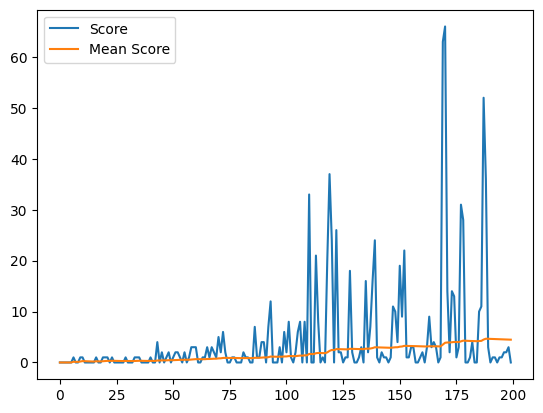

In [20]:
import matplotlib.pyplot as plt

plt.plot(scoresHistory)
plt.plot(meanScores)
plt.legend(["Score", "Mean Score"])

Game End Stats: {'min': 0, 'max': 66, 'mean': 4.48, 'median': 1.0, 'mode': 0, 'stddev': 9.78818896507829}
First Apple Stats: {'min': 0.0, 'max': 4.666666666666667, 'mean': 1.8031924070059524, 'median': 1.184059405940594, 'mode': 0.0, 'stddev': 1.4734085511096906}


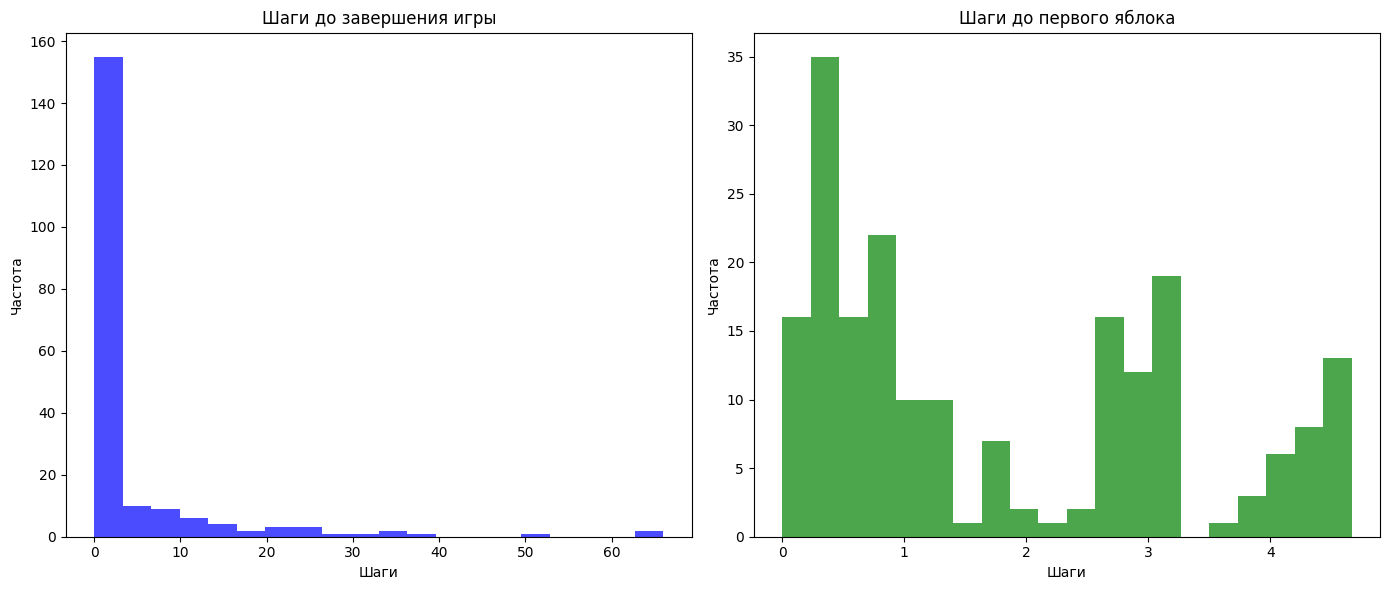

In [31]:
import statistics
import matplotlib.pyplot as plt

# Данные игры
steps_until_game_end = []  # Шаги до завершения игры
steps_until_first_apple = []  # Шаги до первого яблока

# Сохранение статистики для каждой игры
for i, score in enumerate(scoresHistory):
    steps_until_game_end.append(score)
    steps_until_first_apple.append(meanScores[i])

# Функция для расчета статистики
def calculate_stats(data):
    return {
        'min': min(data),
        'max': max(data),
        'mean': statistics.mean(data),
        'median': statistics.median(data),
        'mode': statistics.mode(data) if len(set(data)) > 1 else "No mode",
        'stddev': statistics.stdev(data) if len(data) > 1 else 0
    }

# Вычисление статистик
game_end_stats = calculate_stats(steps_until_game_end)
first_apple_stats = calculate_stats(steps_until_first_apple)

# Вывод статистик
print("Game End Stats:", game_end_stats)
print("First Apple Stats:", first_apple_stats)

# Визуализация данных
plt.figure(figsize=(14, 6))

# График для шагов до завершения игры
plt.subplot(1, 2, 1)
plt.hist(steps_until_game_end, bins=20, color='blue', alpha=0.7)
plt.title("Шаги до завершения игры")
plt.xlabel("Шаги")
plt.ylabel("Частота")

# График для шагов до первого яблока
plt.subplot(1, 2, 2)
plt.hist(steps_until_first_apple, bins=20, color='green', alpha=0.7)
plt.title("Шаги до первого яблока")
plt.xlabel("Шаги")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()